# **Broyden, Fletcher, Golfarb and Shanno (BFGS) with line search method**
Loading python libraries

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as mp

---
## **Line search with Wolfe conditions**
The strong Wolfe conditions are given by
\begin{eqnarray}
f(x_k + \alpha_k p_k ) & \leq & 
f(x_k) + c_1 \alpha_k \left\langle \nabla f( x_k )\ \middle|\ p_k \right\rangle \\
\left| \left\langle \nabla f( x_k + \alpha_k p_k )\ \middle|\ p_k \right\rangle \right| & \leq & 
c_2 \left| \left\langle \nabla f( x_k )\ \middle|\ p_k \right\rangle \right|
\end{eqnarray}
with $0 < c_1 < c_2 < 1$

In [2]:
def line_search_wolfe( x, a, p, f, g, c1, c2, m ) :
  alpha_min = 1e-15
  alpha = a
  alpha_max = 1e9
    
  fx = f( x )
  gx = g( x )
  
  z = x + alpha * p
  fz = f( z )
  gz = g( z )
  
  hx = gx.dot( p )
  hz = gz.dot( p ) 
  
  W1 = fx + alpha * c1 * hx
  W2 = c2 * hx
  i = 0
  while ( ( fz > W1 or hz < W2 ) and i < m ) :
    if ( fz > W1 ) :
      alpha_max = alpha
      alpha = 0.5 * ( alpha_min + alpha_max )
    elif ( hz < W2 ) :
      if ( alpha_max >= 1e9 ) :
        alpha = 2 * alpha
      else :
        alpha_min = alpha
        alpha = 0.5 * ( alpha_min + alpha_max )
    
    z = x + alpha * p
    fz = f( z )
    gz = g( z )
    hz = gz.dot( p ) 
    i = i + 1
    
  chk = fz > W1 or hz < W2
  
  return ( alpha, i, chk )

---
## **BFGS algorithm**

In [3]:
def bfgs_opt( f, g, B, x0, n, m, eps, alpha, c1, c2 ) :
  
  # Intialization
  e = 2 * eps
  ev = []
  
  x = x0
  
  fx0 = f( x0 )
  fx = fx0
  
  gx0 = g( x0 )  
  gx = gx0
  
  # Hessian inverse approximation
  H = B
  
  k = 0
  while ( e > eps and k < n ) :
    p = -H.dot( gx )
    
    # Line search    
    ls = line_search_wolfe( x, alpha, p, f, g, c1, c2, m )
    
    alpha = ls[0]
    s = alpha * p
    
    # Updating values
    x0 = x
    x = x + s
    
    fx0 = fx
    fx = f( x )
    
    gx0 = gx
    gx = g( x )
    y = gx - gx0
    
    # BFGS algorithm
    rho = y.dot( s )
    u = np.identity( x.size ) - np.outer( y, s ) / rho
    H = u.T.dot( H.dot( u ) ) + np.outer( s, s ) / rho
    e = linalg.norm( y )
    ev.append( e )
    k = k + 1
    
  return ( x, fx, gx, p, H, ev, k )

### **1. Example**
The Rosenbrock function $f : \mathbb{R}^2 \longrightarrow \mathbb{R}$ is defined by:
\begin{equation}
f(x,y) = 100 ( y - x^2 )^2 + ( 1 - x )^2
\end{equation}

In [4]:
def f( x ) :
  f = 100 * ( x[1] - x[0]**2 )**2 + ( 1 - x[0] )**2
  return f

the gradient of $f$ is given by
\begin{equation}
\nabla f(x,y) 
= \left[
\begin{array}{c}
400 x^3 - 400 x y + 2x - 2 \\
200 ( y - x^2 )
\end{array}
\right]
\end{equation}

In [5]:
def g( x ) :
  gf = np.array( [ 400 * x[0]**3 - 400 * x[0] * x[1] + 2 * x[0] - 2, 200 * ( x[1] - x[0]**2 ) ] )
  gf = gf.T
  return gf

Iteration starting at point $(x_0,y_0) = (1.2, 1.2)$

In [6]:
n = 1000
m = 200
eps = 1e-12
c1 = 0.001
c2 = 0.01
alpha = 0.1
x0 = np.array( [ 1.2, 1.2 ] )
B = np.identity( 2 )
S = bfgs_opt( f, g, B, x0, n, m, eps, alpha, c1, c2 )
print( 'Optimal point:', S[0] )
print( 'Objective function value:', S[1] )
print( 'Gradient at optimal point:', S[2] )
print( 'Last descent direction:', S[3] )
print( 'Last Hessian inverse approximation:\n', S[4] )
print( 'Iterations:', S[6], '\n' )

Optimal point: [1. 1.]
Objective function value: 5.546678239835239e-29
Gradient at optimal point: [-2.77555756e-13  1.33226763e-13]
Last descent direction: [3.58554044e-15 8.07685655e-15]
Last Hessian inverse approximation:
 [[0.8198418  1.66671285]
 [1.66671285 3.39263161]]
Iterations: 29 



Plotting error in logarithmic scale, $\varepsilon_k = \|g_{k+1} - g_k\|, \forall k \in \mathbb{N}$

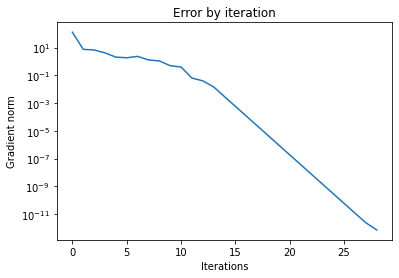

In [7]:
mp.xlabel( 'Iterations' )
mp.ylabel( 'Gradient norm' )
mp.title( 'Error by iteration' )
mp.yscale( 'log' )
mp.plot( S[5] )

Iteration starting at point $(x_0,y_0) = (-1.2, 1.1)$

In [8]:
n = 1000
m = 200
eps = 1e-12
c1 = 0.001
c2 = 0.01
alpha = 0.1
x0 = np.array( [ -1.2, 1.1 ] )
B = np.identity( 2 )
S = bfgs_opt( f, g, B, x0, n, m, eps, alpha, c1, c2 )
print( 'Optimal point:', S[0] )
print( 'Objective function value:', S[1] )
print( 'Gradient at optimal point:', S[2] )
print( 'Last descent direction:', S[3] )
print( 'Last Hessian inverse approximation:\n', S[4] )
print( 'Iterations:', S[6], '\n' )

Optimal point: [1. 1.]
Objective function value: 3.274265794732962e-28
Gradient at optimal point: [ 3.72590847e-13 -1.77635684e-13]
Last descent direction: [7.10356113e-15 1.52467658e-14]
Last Hessian inverse approximation:
 [[0.03743277 0.05966529]
 [0.05966529 0.1020077 ]]
Iterations: 54 



Plotting error in logarithmic scale, $\varepsilon_k = \|g_{k+1} - g_k\|, \forall k \in \mathbb{N}$

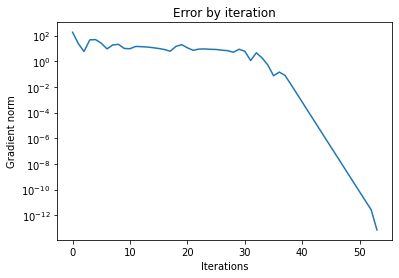

In [9]:
mp.xlabel( 'Iterations' )
mp.ylabel( 'Gradient norm' )
mp.title( 'Error by iteration' )
mp.yscale( 'log' )
mp.plot( S[5] )